# 기본 필요 라이브러리

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import requests
import os
from glob import glob
import io
import numpy as np
from io import BytesIO

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max.colwidth',100)
pd.options.display.max_columns = 100

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. 데이터 불러오기 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv("/content/drive/My Drive/youtube_project/small_total_train_set.csv", encoding='utf-8-sig')
df.shape

(13685, 12)

In [0]:
category = df['category_id']
thumbnail = df['thumbnail']

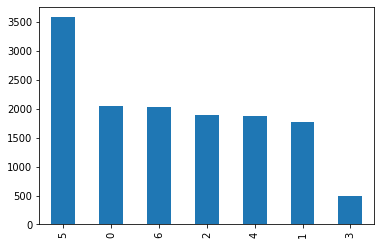

In [0]:
category.value_counts().plot.bar()

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input

Using TensorFlow backend.


- 밑에 저장한 파일 있으니, 돌리지말고 쓰기
- image_train_test_split.npy

In [0]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail[2540:2541] :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img2 = img.convert("RGB")
#     img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

#     # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
#     img = preprocess_input(img)
    X.append(img)

<Figure size 432x288 with 0 Axes>

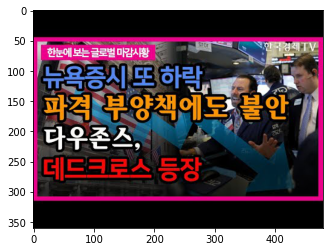

(360, 480, 3)

In [0]:
for i in range(len(X)):
    plt.figure()
    plt.imshow(X[i]/256)
    plt.show()
    X[i].shape

In [0]:
image_w = 64 
image_h = 64
pixels = image_w * image_h * 3
X = []
for i in thumbnail :
    
    url = i+str('.jpg')
    response = requests.get(url, stream=True) 
    img= Image.open(io.BytesIO(response.content)) 
    
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    img = image.img_to_array(img)

    # 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
    img = preprocess_input(img)
    X.append(img)

In [0]:
X_train[1]

array([[[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       ...,

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1

In [0]:
X = np.array(X)
Y = np.array(category)
Y = pd.get_dummies(Y).to_numpy()

In [0]:
X.shape
Y.shape

(13685, 64, 64, 3)

(13685, 7)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, Y)
xy = (X_train, X_test, y_train, y_test)
np.save("image_train_test_split.npy", xy)
print("ok,", len(Y))

ok, 13685


# 데이터 다시 열고 확인

In [0]:
# !pip install numpy==1.16.1
import numpy as np

In [0]:
# 데이터 열기 

# 혹시 ValueError: Object arrays cannot be loaded when allow_pickle=False => !pip install numpy==1.16.1
X_train, X_valid, y_train, y_valid = np.load("image_train_test_split.npy", allow_pickle=True)

In [0]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((10263, 64, 64, 3), (3422, 64, 64, 3), (10263, 7), (3422, 7))

- 이미지 확인해보기

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


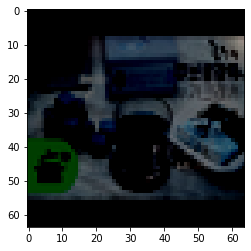

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


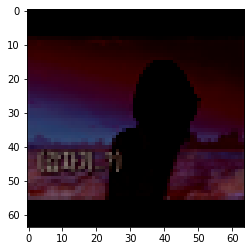

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


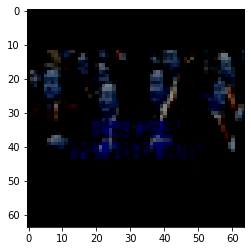

In [0]:
for i in range(3):
    plt.figure()
    plt.imshow(X_train[i]/256)
    plt.show()

# CNN_Sequential

In [0]:
# 카테고리 지정하기
categories = category.unique()
nb_classes = len(categories)
# 이미지 크기 지정하기
image_w = 64
image_h = 64

# 데이터 정규화하기(0~1사이로)
X_train = X_train.astype("float") / 64 # 256 으로 하면?
X_valid  = X_valid.astype("float")  / 64
print('X_train shape:', X_train.shape) # 74%
print('X_valid shape:', X_valid.shape)


X_train shape: (10263, 64, 64, 3)
X_valid shape: (3422, 64, 64, 3)


In [0]:
from keras.models import Sequential
from keras import metrics
from keras import optimizers
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3))) #전체 train에 돌릴때는 32로
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
last_layer = model.add(Dropout(0.25))

# 전결합층
model.add(Flatten())    # 벡터형태로 reshape
model.add(Dense(512))   # 출력
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(nb_classes))
model.add(Activation('softmax'))
# 모델 구축하기
model.compile(loss='categorical_crossentropy',   # 최적화 함수 지정
    optimizer='rmsprop',
    metrics=['accuracy'])

# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 64)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 10263 samples, validate on 3422 samples
Epoch 1/20
10263/10263 [==============================] - 10s 978us/step - loss: 1.4086 - accuracy: 0.5286 - val_loss: 0.8602 - val_accuracy: 0.6897
Epoch 2/20
10263/10263 [==============================] - 4s 360us/step - loss: 0.8359 - accuracy: 0.7098 - val_loss: 0.7296 - val_accuracy: 0.7481
Epoch 3/20
10263/10263 [==============================] - 4s 359us/step - loss: 0.6577 - accuracy: 0.7708 - val_loss: 0.6675 - val_accuracy: 0.7703
Epoch 4/20
10263/10263 [==============================] - 4s 360us/step - loss: 0.5452 - accuracy: 0.8111 - val_loss: 0.6405 - val_accuracy: 0.7829
Epoch 5/20
10263/10263 [==============================] - 4s 357us/step - loss: 0.4557 - accuracy: 0.8435 - val_loss: 0.6977 - val_accuracy: 0.7618
Epoch 6/20
10263/10263 [==============================] - 4s 362us/step - loss: 0.3729 - accuracy: 0.8762 - val_loss: 0.6896 - val_accuracy: 0.7884
Epoch 7/20
10263/10263 [==============================] - 4s 3

(0.0, 1.0)

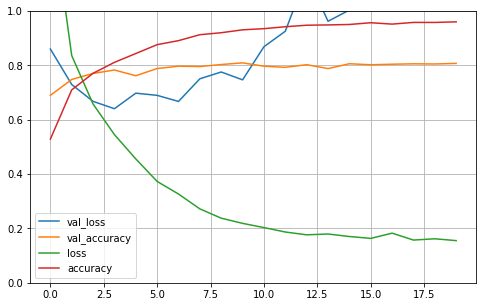

In [0]:
history1 = model.fit(X_train, y_train, batch_size=32, nb_epoch=20 , validation_data=(X_valid, y_valid))


- 모델 불러오기

In [0]:
from keras.models import model_from_json   
json_file = open("seq_model_81.json", "r")   
loaded_model_json = json_file.read()   
json_file.close()   
loaded_model = model_from_json(loaded_model_json)  

## 해석해보기

from keras import backend as K

In [0]:
plt.figure()
plt.imshow(X[i]/256)
    plt.show()
    X[i].shape

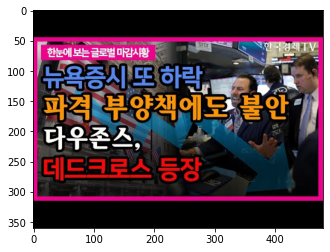

In [0]:
x_ori = X[0]

x_ori = np.expand_dims(x_ori, axis=0)

plt.imshow(x_ori[0]/255)

In [0]:
# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
img = img2.resize((image_w, image_h))
img = image.img_to_array(img)
img = preprocess_input(img)
x = np.expand_dims(img, axis=0)
x = x.astype("float")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


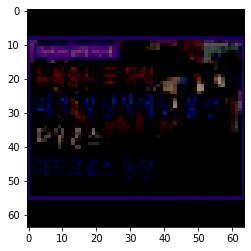

In [0]:
plt.imshow(x[0]/255)

In [0]:
# x = np.expand_dims(x, axis=0)
# img.astype("float")

In [0]:
x[0]

array([[[-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        ...,
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031]],

       [[-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        ...,
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031]],

       [[-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        ...,
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299, -116.77899933, -123.68000031],
        [-103.93900299

In [0]:
X_valid[0]

array([[[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        ...,
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ],
        [-1.62404692, -1.82467186, -1.9325    ]],

       ...,

       [[-1.62404692, -1.82467186, -1.9325    ],
        [-1

In [0]:
# x = x.astype("float")
x = x/255
preds = model.predict(x)
most_class = np.argmax(preds[0])
print(most_class)

0


In [0]:
x.shape

(1, 64, 64, 3)

In [0]:
# 예측 벡터의 'tabby' 항목
african_crocodile_output = model.output[:, most_class] #(?,)

# VGG16의 마지막 합성곱 층인 block5_conv3 층의 특성 맵
last_conv_layer = model.get_layer("conv2d_3") # (?, 14, 14, 512)

# block5_conv3의 특성 맵 출력에 대한 'tabby' 클래스의 그래디언트
grads = K.gradients(african_crocodile_output, last_conv_layer.output)[0] # 안에 값이 1인 list -> tensor

print(grads.shape) # (?, 14, 14, 512)

# 특성 맵 채널별 그래디언트 평균 값이 담긴 (512,) 크기의 벡터 -> 512개의 필터를 가지고 있다.
## 채널이 총 512 개 그 마지막 conv layer의 output 크기는 (14,14)
pooled_grads = K.mean(grads, axis=(0, 1, 2))

print(pooled_grads.shape) # (512,)

# 샘플 이미지가 주어졌을 때 방금 전 정의한 pooled_grads와 block5_conv3의 특성 맵 출력을 구합니다
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# 샘플 이미지를 주입하고 두 개의 넘파이 배열을 얻습니다
pooled_grads_value, conv_layer_output_value = iterate([x])  # x : 고양이 샘플 이미지

# "코끼리" 클래스에 대한 "채널의 중요도"를 특성 맵 배열의 채널에 곱합니다 -> 512개의 필터 각각의 그레디언트 값에 곱해감 
## grads 가 클 수록 그 채널의 변화에 따른 output의 변화가 크다는 것을 의미 (그 채널에 더 큰 가중치를 줌)
for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 만들어진 특성 맵에서 채널 축을 따라 평균한 값이 클래스 활성화의 히트맵입니다
heatmap = np.mean(conv_layer_output_value, axis=-1)

(None, 30, 30, 64)
(64,)


In [0]:
heatmap.shape

(30, 30)

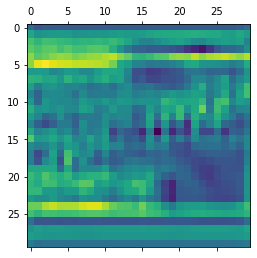

In [0]:
# heatmap = np.maximum(heatmap, 0) # relu느낌으로 결과값을 보기 편하게
heatmap /= np.max(heatmap) # 표준화 느낌?
plt.matshow(heatmap, cmap='viridis')
plt.show()

In [0]:
import cv2
# x[0]
heatmap = cv2.resize(heatmap, (480,360))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + x_ori[0]

<Figure size 432x288 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


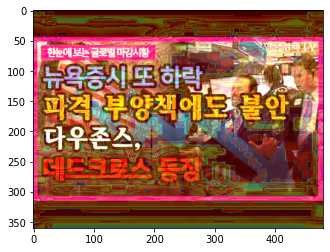

In [0]:
# 이미지 경로
# cam_img_path = './sample_data/cam.jpg'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
# superimposed_img = image.load_img(cam_img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
# superimposed_img1 = image.img_to_array(superimposed_img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
# superimposed_img1 = np.expand_dims(superimposed_img1, axis=0)
plt.figure()
plt.imshow(superimposed_img/255)
plt.show()